In [1]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [2]:
# 모델 학습 시 불필요한 출력을 끄도록 함 (warning)
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

In [8]:
# 학습 or 실행 도중 오류가 나서 session이 안닫혔을 경우
# tf.reset_default_graph ()

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module6

    -Part 02. CNN with keras
    
        01. CNN with keras

- 인공지능을 케라스로 구현하는 방법
     - 함수형 구현
         - ANN 모델을 직접 설계하는 인공지능 전문가에게 적합
     - 객체지향형 구현
         - 전문가가 만들어놓은 ANN모델을 사용하는 사용자에게 적합
     - 분산방식과 연쇄방식, 혼합장식으로 구현
         - 분산방식은 구조가 복잡한 경우에 적합
         - 연쇄방식은 하나의 순서로 구성된 간단한 신경망 구현에 적합
         
케라스 작성 단계
    1. 인공지능 구현용 패키지 불러오기
    2. 인공지능에 필요한 파라미터 설정
    3. 인공지능 모델 구현
    4. 학습과 성능 평가용 데이터 불러오기
    5. 인공지능 학습 및 성능 분석
    
인공지능에 필요한 파라미터 설정
    - 분류 ANN에 필요한 파라미터 설정
        - Nin, Nh, number_of_class, Nout

In [ ]:
# 1. 분산방식 모델링을 포함하는 함수형 구현
x = layers.Input(shape = (Nin,))
h = layers.Activation('relu')(layers.Dense(Nh)(x))
y = layers.Activation('softmax')(layers.Dense(Nout)(h))
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam', metrics = ['accuracy'])

# 연쇄방식 모델링을 포함하는 함수형 구현
model = model.Sequential()
model.add(layers.Dense(Nh, activation = 'relu', input_shape = (Nin,)))
model.add(layers.Dense(Nout, activation = 'softmax', metrics = ['accuracy']))

# 분산방식 모델링을 포함하는 객체지향형 구현
class ANN(model.Model):
    def __init__(self, Nin, Nh, Nout):
        hideen = layers.dense(Nh)
        output = layers.dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')
        
        super().__init__(x,y)
        
model = ANN(Nin, Nh, Nout)

# 연쇄방식 모델링을 포함하는 객체지향형 구현
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__(x,y)
        self.add(layers.Dense(Nh, activation = 'relu', input_shape = (Nin,)))
        self.add(layers.Dense(Nout, activation = 'softmax', metrics = ['accuracy']))
    
model = ANN_seq_class(Nin, Nh, Nout)

p. 1059 보기

#### p.1060 사이트에서 제공하는 dataset

    나중에 한번 다운받고 돌려보기

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module6

    -Part 02. CNN with keras
    
        02. 컬러 이미지 분류하기

    p.1067 github -> 5-1읽고 -> 5-2다운받아서 실행하기

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2 )))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
60000/60000 [==============================] - 9s 151us/step - loss: 0.1690 - acc: 0.9469
Epoch 2/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0475 - acc: 0.9854
Epoch 3/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0336 - acc: 0.9897
Epoch 4/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0258 - acc: 0.9922
Epoch 5/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0207 - acc: 0.9937


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 99us/step


In [13]:
test_acc

0.9883

### 개와 강아지 분류 (CNN full process)

    github.com/gilbutITbook/006975

In [7]:
import os, shutil

In [11]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [19]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


1. 네트워크 구성하기

In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [9]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

2. 데이터 전처리

    - 사진 데이터 사이즈 변경
    - 타깃 디렉터리에서 사진 불러오기
    - 이미지 스케일 조정

##### ImageDataGenerator()

디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 제너레이터를 만들어 줍니다.

    첫번재 인자 : 이미지 경로를 지정합니다.
    target_size : 패치 이미지 크기를 지정합니다. 폴더에 있는 원본 이미지 크기가
                  다르더라도 target_size에 지정된 크기로 자동 조절됩니다.
    batch_size : 배치 크기를 지정합니다.
    class_mode : 분류 방식에 대해서 지정합니다.
    categorical : 2D one-hot 부호화된 라벨이 반환됩니다.
    binary : 1D 이진 라벨이 반환됩니다.
    sparse : 1D 정수 라벨이 반환됩니다.
    None : 라벨이 반환되지 않습니다.

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
#            train_dir = os.path.join(base_dir, 'train')
#            os.mkdir(train_dir)
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [41]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (32, 150, 150, 3)
배치 레이블 크기: (32,)


In [30]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
    # 한 epoch에 사용한 스텝 수를 지정합니다. 총 45개의 훈련 샘플이 있고
    # 배치사이즈가 3이므로 15 스텝으로 지정합니다.
    # train 고양이 1000개, 강아지 1000개 -> batch가 20이므로 2000/20 = steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
    # 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정합니다.
    # 홍 15개의 검증 샘플이 있고 배치사이즈가 3이므로 5 스텝으로 지정합니다.
    # 검증 데이터 1000개 -> steps 50이므로 -> 배치는 각 20개가 됨

Epoch 1/30
100/100 [==============================] - 7s 67ms/step - loss: 0.6909 - acc: 0.5370 - val_loss: 0.6788 - val_acc: 0.6050
Epoch 2/30
100/100 [==============================] - 6s 56ms/step - loss: 0.6578 - acc: 0.6180 - val_loss: 0.6391 - val_acc: 0.6340
Epoch 3/30
100/100 [==============================] - 6s 56ms/step - loss: 0.6041 - acc: 0.6775 - val_loss: 0.6513 - val_acc: 0.6280
Epoch 4/30
100/100 [==============================] - 6s 56ms/step - loss: 0.5628 - acc: 0.7015 - val_loss: 0.5893 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 6s 57ms/step - loss: 0.5391 - acc: 0.7180 - val_loss: 0.5857 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 6s 57ms/step - loss: 0.5016 - acc: 0.7495 - val_loss: 0.5775 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 6s 59ms/step - loss: 0.4850 - acc: 0.7605 - val_loss: 0.5505 - val_acc: 0.7190
Epoch 8/30
100/100 [==============================] - 6s 59ms/step - 

In [31]:
model.save('cats_and_dogs_small_1.h5')

In [13]:
import matplotlib.pyplot as plt

##### 중요!!!!!

    아래 그래프는 과대적합이 언제부터 일어나는지를 보는 그래프
    과대적합이 일찍 일어났다는 것은 데이터가 많이 부족하다는 뜻

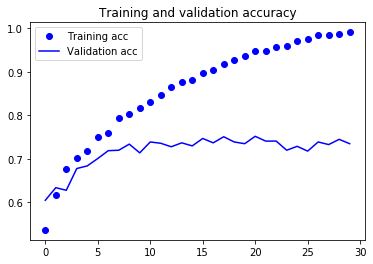

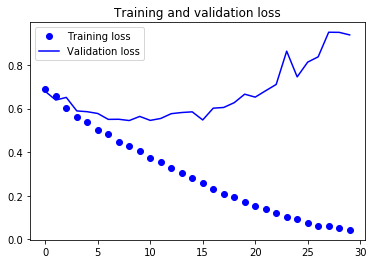

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

3. 데이터 증식하기

In [14]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
datagen.fit(x_train)

model.fit_generator(datagen.flow(x_train, y_train, batch_size=20),
                    steps_per_epoch=len(x_train) / 20, epochs=epochs)



for e in range(epochs):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=20):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= len(x_train) / 20:
            break

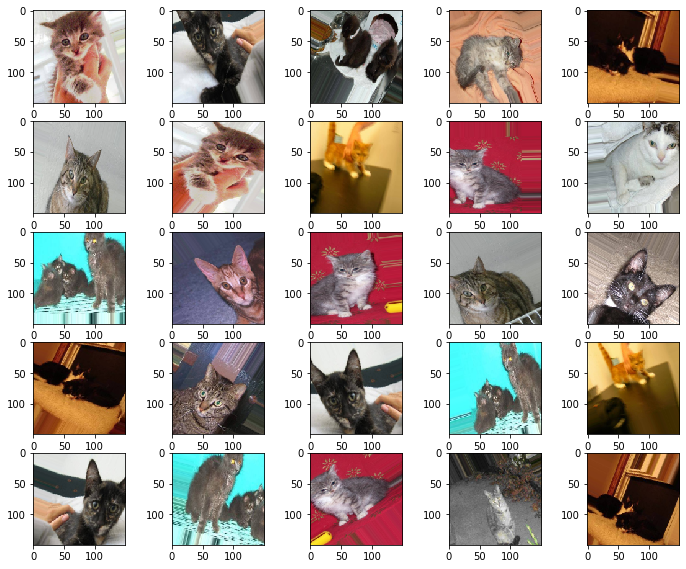

In [62]:
import numpy as np
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[0:20]


aaa = []
for i in range(len(img_path)):
    img = image.load_img(img_path[i], target_size = (150,150))
    x = image.img_to_array(img)
    aaa.append(x)
    
y = np.array(aaa)

i = 0
plt.figure(figsize = (12,20))
for batch in datagen.flow(y, batch_size=4):
    plt.subplot(10,5,i+1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 25 == 0:
        break

plt.show()

In [ ]:
# fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
# batch_size = 20
# aaa = []
# for img_path in fnames:
#     img = image.load_img(img_path, target_size = (150, 150))
#     x = image.img_to_array(img)
#     x = x.reshape((1,) + x.shape)
    
#     i = 0
#     for batch in datagen.flow(x, batch_size=batch_size):
#         plt.figure(i)
#         imgplot = plt.imshow(image.array_to_img(batch[0]))
#         i += 1
#         if i % 12 == 0:
#             break

#     plt.show()

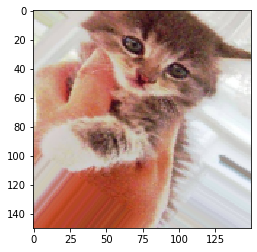

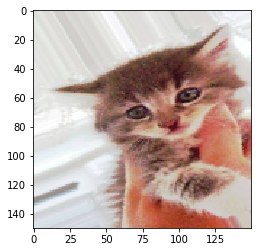

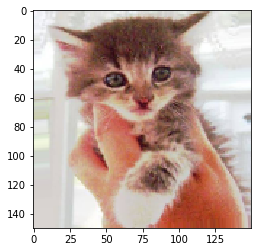

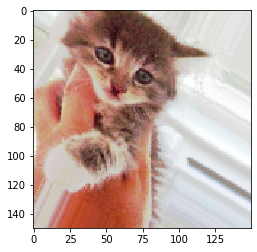

In [32]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
# 이 반복자는 x, y를 가지고 한번에 batch_size만큼의 랜덤하게 변형된 학습 데이터를 만듬

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 19s 193ms/step - loss: 0.6932 - acc: 0.5159 - val_loss: 0.6793 - val_acc: 0.5698
Epoch 2/100
100/100 [==============================] - 20s 198ms/step - loss: 0.6848 - acc: 0.5591 - val_loss: 0.6646 - val_acc: 0.6102
Epoch 3/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6695 - acc: 0.5869 - val_loss: 0.6647 - val_acc: 0.5768
Epoch 4/100
100/100 [==============================] - 22s 223ms/step - loss: 0.6552 - acc: 0.6053 - val_loss: 0.6411 - val_acc: 0.6218
Epoch 5/100
100/100 [==============================] - 24s 237ms/step - loss: 0.6301 - acc: 0.6444 - val_loss: 0.6390 - val_acc: 0.6263
Epoch 6/100
100/100 [==============================] - 25s 248ms/step - loss: 0.6144 - acc: 0.6547 - val_loss: 0.6056 - val_acc: 0.6604
Epoch 7/100
100/100 [==============================] - 26s 262ms/step - loss: 0.6025 - acc: 0.6753 -

In [38]:
model.save('cats_and_dogs_small_2.h5')

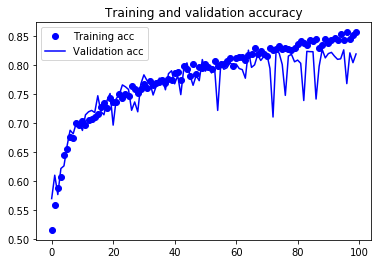

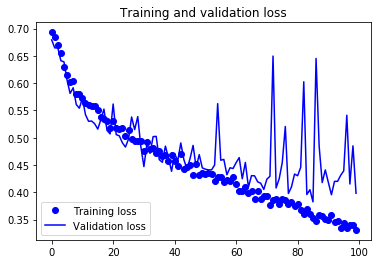

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()